In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# 변경하고자 하는 새로운 디렉토리 경로
new_directory = '/content/drive/MyDrive'

# 디렉토리 위치 변경
os.chdir(new_directory)

# 변경된 디렉토리 경로 출력
print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Variable
import dezero.functions as F

np.random.seed(0)
# x = np.random.rand(100, 1)
# y = 5 + 2 * x + np.random.rand(100, 1)
# x. y = Variable(x). Variable(y)

x = np.random.rand(100, 1)
y = 5 + 2 * x + np.random.rand(100, 1)
x = Variable(x)
y = Variable(y)

W = Variable(np.random.rand(1, 1))
b = Variable(np.zeros(1))

In [ ]:
def predict(x):
  y = F.matmul(x, W) + b
  return y

In [ ]:
def mean_squared_error(x0, x1):
  diff = x0 -x1
  return F.sum(diff ** 2) / len(diff)

In [ ]:
lr = 0.1
iters = 100

for i in range(iters):
  y_pred = predict(x)
  loss = mean_squared_error(y, y_pred)

  W.cleargrad()
  b.cleargrad()
  loss.backward()

  W.data -= lr * W.grad.data
  b.data -= lr * b.grad.data
  print(W, b, loss)

variable([[1.4042349]]) variable([2.21833226]) variable(22.868379151562564)
variable([[1.75268447]]) variable([2.93661697]) variable(12.998108825107881)
variable([[2.0118434]]) variable([3.47829578]) variable(7.414441496057018)
variable([[2.20388753]]) variable([3.88713308]) variable(4.255402853365201)
variable([[2.34549437]]) variable([4.19604346]) variable(2.4678141875542026)
variable([[2.44920622]]) variable([4.4297816]) variable(1.4559713477474892)
variable([[2.5244554]]) variable([4.60696524]) variable(0.8829289799259084)
variable([[2.57833526]]) variable([4.74159669]) variable(0.5581020389515313)
variable([[2.61618006]]) variable([4.84420703]) variable(0.37369045855724076)
variable([[2.64200111]]) variable([4.92271675]) variable(0.26871939177846316)
variable([[2.65881477]]) variable([4.98308292]) variable(0.2086994924232526)
variable([[2.66888909]]) variable([5.02978597]) variable(0.17412227321272536)
variable([[2.67392936]]) variable([5.0661958]) variable(0.15395279905273213)
va

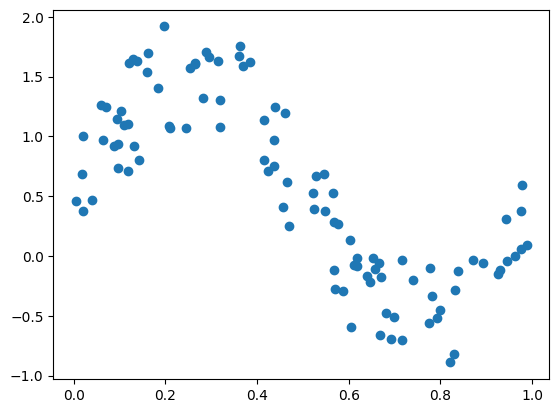

In [ ]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

plt.scatter(x, y)

In [ ]:
#신경망 구조에서 기본적인 구조

W1, b1 = Variable(np.random.rand(1, 100)), Variable(np.zeros(100))
W2, b2 = Variable(np.random.rand(100, 1)), Variable(np.zeros(1)) #라는 가정

def predict(x):
  y = F.linear(x, W1, b1)
  y = F.sigmoid(y)
  y = F.linear(y, W2, b2)
  return y
  #linear -> sigmoid -> linear ~ 반복구조

In [ ]:
#선형 -> 비선형
def sigmoid_simple(x):
  x = as_variable(x)
  y = 1 / (1 + exp(-x))
  return y

In [ ]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

I, H, O = 1, 100, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
  y = F.linear(x, W1, b1)
  y = sigmoid_simple(y)
  y = F.linear(y, W2, b2)
  return y

In [ ]:
import numpy as np
import dezero.functions as F
from dezero import Variable

np.random.seed(0)
x = Variable(np.random.rand(100, 1))
y = F.sin(2 * np.pi * x) + Variable(np.random.rand(100, 1))

I, H, O = 1, 100, 1
W1 = Variable(0.01 * np.random.randn(I, H))
b1 = Variable(np.zeros(H))
W2 = Variable(0.01 * np.random.randn(H, O))
b2 = Variable(np.zeros(O))

def predict(x):
    y = F.linear(x, W1, b1)
    y = sigmoid_simple(y)
    y = F.linear(y, W2, b2)
    return y

lr = 0.2
iters = 1000

for i in range(iters):
    y_pred = predict(x)
    loss = F.mean_squared_error(y, y_pred)

    W1.cleargrad()
    b1.cleargrad()
    W2.cleargrad()
    b2.cleargrad()
    loss.backward()

    W1.data -= lr * W1.grad.data
    b1.data -= lr * b1.grad.data
    W2.data -= lr * W2.grad.data
    b2.data -= lr * b2.grad.data
    if i % 100 == 0:
        print(loss)


NameError: name 'as_variable' is not defined

### 매개변수를 모아두는 계층

- 딥러닝을 더 간단하고 직관적으로 구현

- 층이 깊어 질수록 매개변수 관리가 번거로워짐

- 매개변수 관리를 간소화하는 구조가 필요함
ㄴ 그래서 parameter & Layer Class를 생성함

In [ ]:
class Parameter(Variable):
  pass

"""
Variable과 parameter 구분 어떻게함 ?
isinstance 함수로 구분 가능
"""

In [ ]:
import numpy as np
from dezero import Variable, Parameter

x = Variable(np.array(1.0))
w = Parameter(np.array(2.0))
b = x * w

print(isinstance(x, Parameter))
print(isinstance(w, Parameter))
print(isinstance(b, Parameter))

"""
이런식으로 구분이 가능함
"""

False
True
False


In [ ]:
from dezero.core import Parameter

class Layer:
